<a href="https://colab.research.google.com/github/tessasaporito/ds1002-fce6sy/blob/main/homework/week-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Week 15

Complete the following blocks as specified in the directions. Run each cell to return the desired output. Save your notebook back to your GitHub repository and submit the GitHub URL to your notebook for review.

In [337]:
library(ggplot2)
library(dplyr)

## 1. Create Functions (4 pts)

Create two functions in the cells below, according to the prompts given.

In [338]:
# create a function in R that:
#   1. takes a single integer as an input parameter
#   2. determines whether the integer is even or odd
#   3. returns a character statement "The integer <x> is even" or "The integer <x> is odd" (replace <x> with the actual input provided)
#
# then execute the function twice using two different input values, displaying even and odd results.

even_odd <- function(x) {
  if (x %% 2 == 0) {
    print(paste("The integer", x, "is even"))
  } else {
    print(paste("The integer", x, "is odd"))
  }
}

In [339]:
even_odd(2)

[1] "The integer 2 is even"


In [340]:
even_odd(3)

[1] "The integer 3 is odd"


In [341]:
# create a function in R that:
#   1. takes 4 integer input parameters
#   2. returns the mean value of the inputs
#   3. has default values for the 4 input parameters, in case they are not provided when the function is called.
#
# then execute the function twice: once where you provide the input values, and once where you do not.

calc_mean <- function(a = 1, b = 1, c = 1, d = 1) {
  return (mean(c(a, b, c, d)))
}

In [342]:
print(calc_mean(86,42,12,5))

[1] 36.25


In [343]:
print(calc_mean())

[1] 1


## 2. Plot Data (4 pts)

In the cell below, write the code required to plot from the `msleep` sample data set.

1. Display only animals with body weights of 30 or greater.
2. Group the animals by `order`.
3. Display the mean `sleep_total` for each group in a bar plot.

In [344]:
data(msleep)

In [345]:
new_msleep <- msleep %>%
  filter(bodywt >= 30) %>%
  group_by(order) %>%
  summarize(mean_sleep = mean(sleep_total, na.rm = TRUE))

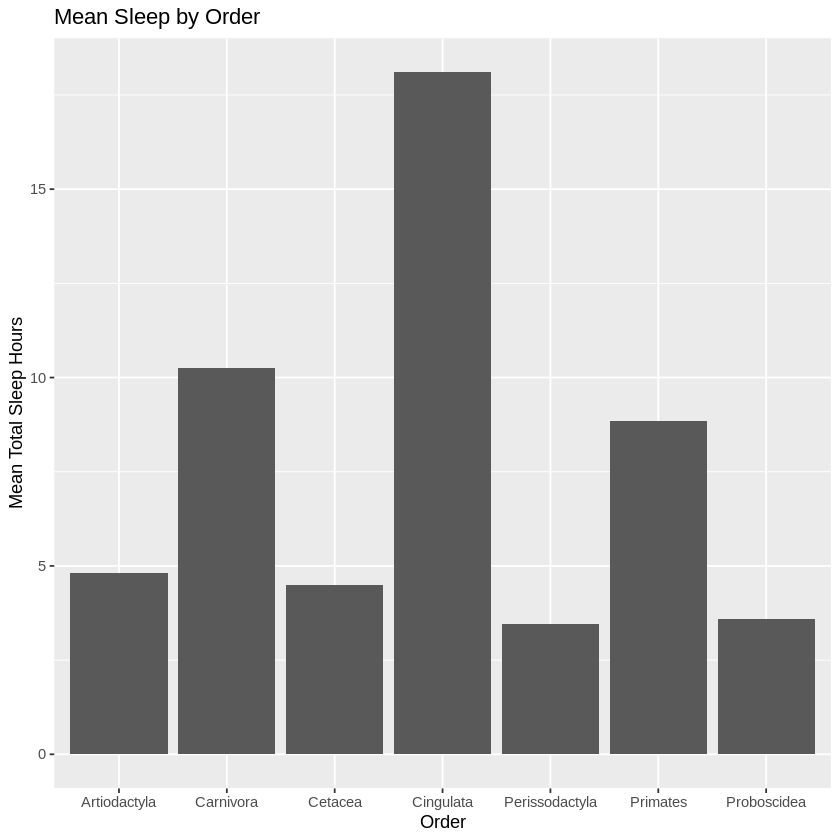

In [346]:
ggplot(new_msleep, aes(x = order, y = mean_sleep)) +
  geom_bar(stat = "identity") +
  labs(title = "Mean Sleep by Order",
       x = "Order",
       y = "Mean Total Sleep Hours")

## 3. Clean and Analyze Data Using R (4 pts)

In the cells below use R to perform the following data cleaning steps on this file:
https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv

1. Remove any duplicate rows.
2. Remove any records where `last_login` or `birthdate` are empty.
3. Display only the records with the 10 highest `follower` counts.
4. Determine counts of users when grouped by continent.

In [347]:
df<-read.csv('https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv')
df

username,full_name,birthdate,email,continent,followers,last_login,interests
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
ckippen0,Clevey Kippen,5/1/1991,ckippen0@t-online.de,NA,12362,5/16/2023,music
tgergler1,Tedi Gergler,10/5/1998,tgergler1@salon.com,NA,21360,8/20/2020,sports
spomfrett2,Steffie Pomfrett,,spomfrett2@imdb.com,NA,19530,11/19/2022,sports
rphettis3,Ruddy Phettis,6/18/1984,rphettis3@npr.org,EU,80047,9/20/2023,travel
ngilcriest4,Nico Gilcriest,10/11/1993,ngilcriest4@dyndns.org,NA,33544,,music
fhampson5,Farrell Hampson,11/7/1985,fhampson5@lulu.com,OC,72161,,sports
ttotman6,Tamqrah Totman,8/7/1986,ttotman6@elpais.com,AF,42669,3/10/2023,music
bdennes7,Bonita Dennes,,bdennes7@cnet.com,NA,22516,2/3/2023,sports
kgrigoryev8,Krishna Grigoryev,5/25/1990,kgrigoryev8@quantcast.com,EU,93923,1/30/2023,travel


In [348]:
df <- df[!duplicated(df), ]
df

,username,full_name,birthdate,email,continent,followers,last_login,interests
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,ckippen0,Clevey Kippen,5/1/1991,ckippen0@t-online.de,NA,12362,5/16/2023,music
2,tgergler1,Tedi Gergler,10/5/1998,tgergler1@salon.com,NA,21360,8/20/2020,sports
3,spomfrett2,Steffie Pomfrett,,spomfrett2@imdb.com,NA,19530,11/19/2022,sports
4,rphettis3,Ruddy Phettis,6/18/1984,rphettis3@npr.org,EU,80047,9/20/2023,travel
5,ngilcriest4,Nico Gilcriest,10/11/1993,ngilcriest4@dyndns.org,NA,33544,,music
6,fhampson5,Farrell Hampson,11/7/1985,fhampson5@lulu.com,OC,72161,,sports
7,ttotman6,Tamqrah Totman,8/7/1986,ttotman6@elpais.com,AF,42669,3/10/2023,music
8,bdennes7,Bonita Dennes,,bdennes7@cnet.com,NA,22516,2/3/2023,sports
9,kgrigoryev8,Krishna Grigoryev,5/25/1990,kgrigoryev8@quantcast.com,EU,93923,1/30/2023,travel


In [349]:
df[df==""] <- NA
df <- na.omit(df)
df

,username,full_name,birthdate,email,continent,followers,last_login,interests
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
4,rphettis3,Ruddy Phettis,6/18/1984,rphettis3@npr.org,EU,80047,9/20/2023,travel
7,ttotman6,Tamqrah Totman,8/7/1986,ttotman6@elpais.com,AF,42669,3/10/2023,music
9,kgrigoryev8,Krishna Grigoryev,5/25/1990,kgrigoryev8@quantcast.com,EU,93923,1/30/2023,travel
12,mchittockb,Myriam Chittock,1/26/1989,mchittockb@uiuc.edu,AF,46304,8/29/2023,sports
14,aeasbyd,Alessandra Easby,1/5/1991,aeasbyd@google.ca,AF,16786,6/15/2023,sports
19,omarusiki,Otha Marusik,12/4/1992,omarusiki@cdbaby.com,AF,93981,2/4/2022,travel
21,sspenclayk,Scott Spenclay,12/7/1989,sspenclayk@wikispaces.com,AF,31745,11/29/2022,sports
22,gklinckl,Georgetta Klinck,7/26/1996,gklinckl@over-blog.com,SA,69386,9/10/2023,sports
23,rhollowm,Riccardo Hollow,1/18/1980,rhollowm@dyndns.org,OC,73088,1/22/2020,sports


In [350]:
df_top_followers <- df[order(-df$followers), ][1:10, ]
df_top_followers

,username,full_name,birthdate,email,continent,followers,last_login,interests
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
721,lleckeyb6,Lynne Leckey,4/19/1998,lleckeyb6@tripadvisor.com,SA,99977,3/14/2021,sports
821,cduftondy,Celisse Dufton,8/24/1995,cduftondy@ox.ac.uk,OC,99707,9/26/2021,sports
578,dbartalin77,Desiree Bartalin,8/23/1993,dbartalin77@usda.gov,AF,99618,5/30/2022,music
1136,grivardmp,Gwen Rivard,9/12/1982,grivardmp@google.com.hk,OC,99526,4/4/2020,music
960,kmorriceht,Kitti Morrice,6/3/1995,kmorriceht@privacy.gov.au,SA,98936,3/24/2021,sports
595,smacdonnell7o,Shoshanna MacDonnell,9/12/2002,smacdonnell7o@toplist.cz,AS,98760,7/20/2021,music
1264,ebroomq9,Early Broom,3/10/2000,ebroomq9@fastcompany.com,AF,98606,10/22/2023,sports
164,schapell4j,Shepard Chapell,9/3/1993,schapell4j@noaa.gov,AS,98479,2/14/2021,music
1243,tbaptiepo,Thorvald Baptie,10/23/1981,tbaptiepo@indiegogo.com,OC,98233,5/27/2022,sports


In [351]:
by_continent <- df %>%
  group_by(continent) %>%
  summarize(user_count = n())
by_continent

continent,user_count
<chr>,<int>
AF,70
AS,111
EU,77
OC,95
SA,69
